<a href="https://colab.research.google.com/github/fitranurmayadi/yolov10_face_tracking/blob/main/yolov10_face_detection_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Check GPU

In [1]:
!nvidia-smi

Sat Jun 15 10:41:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##Set Working directory

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


##Install Yolov10

In [3]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.4 MB/s eta 0:00:00


##install depedencies

In [4]:
!pip install -q supervision roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76


##download yolo pretrained model

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt


##install kaggle depedencies

In [6]:
!pip install -q kaggle

In [7]:
import json
dictionary = {"username":"YOUR-USERNAME","key":"YOUR-KAGGLE-API-KEY"}
json_object = json.dumps(dictionary, indent=4)
with open("kaggle.json", "w") as outfile:
    outfile.write(json_object)

In [8]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

##Import depedencies

In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

##Download Dataset

In [10]:
  !kaggle datasets download -d fareselmenshawii/face-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset
License(s): CC0-1.0
100% 4.42G/4.43G [01:06<00:00, 73.7MB/s]
100% 4.43G/4.43G [01:06<00:00, 71.4MB/s]


##Create dataset folder

In [12]:
!mkdir {HOME}/datasets

###unzip datasets

In [13]:
!unzip -q face-detection-dataset.zip -d "datasets/face-detection-dataset"

##Set dataset yaml parameter

In [14]:
import yaml

dataset_config = {
    'nc': 1,  # jumlah kelas (contoh: 1 untuk face detection)
    'names': ['face'],  # nama kelas
    'train': '/content/datasets/face-detection-dataset/images/train',  # path ke folder train
    'val': '/content/datasets/face-detection-dataset/images/val',  # path ke folder val
}

with open('/content/datasets/face-detection-dataset/dataset.yaml', 'w') as file:
    yaml.dump(dataset_config, file, default_flow_style=False)


##Train Models

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 batch=32 plots=True \
model=/content/weights/yolov10s.pt \
data=/content/datasets/face-detection-dataset/dataset.yaml

/content
New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10s.pt, data=/content/datasets/face-detection-dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

##Show result performance

###Confusion Matrix

/content


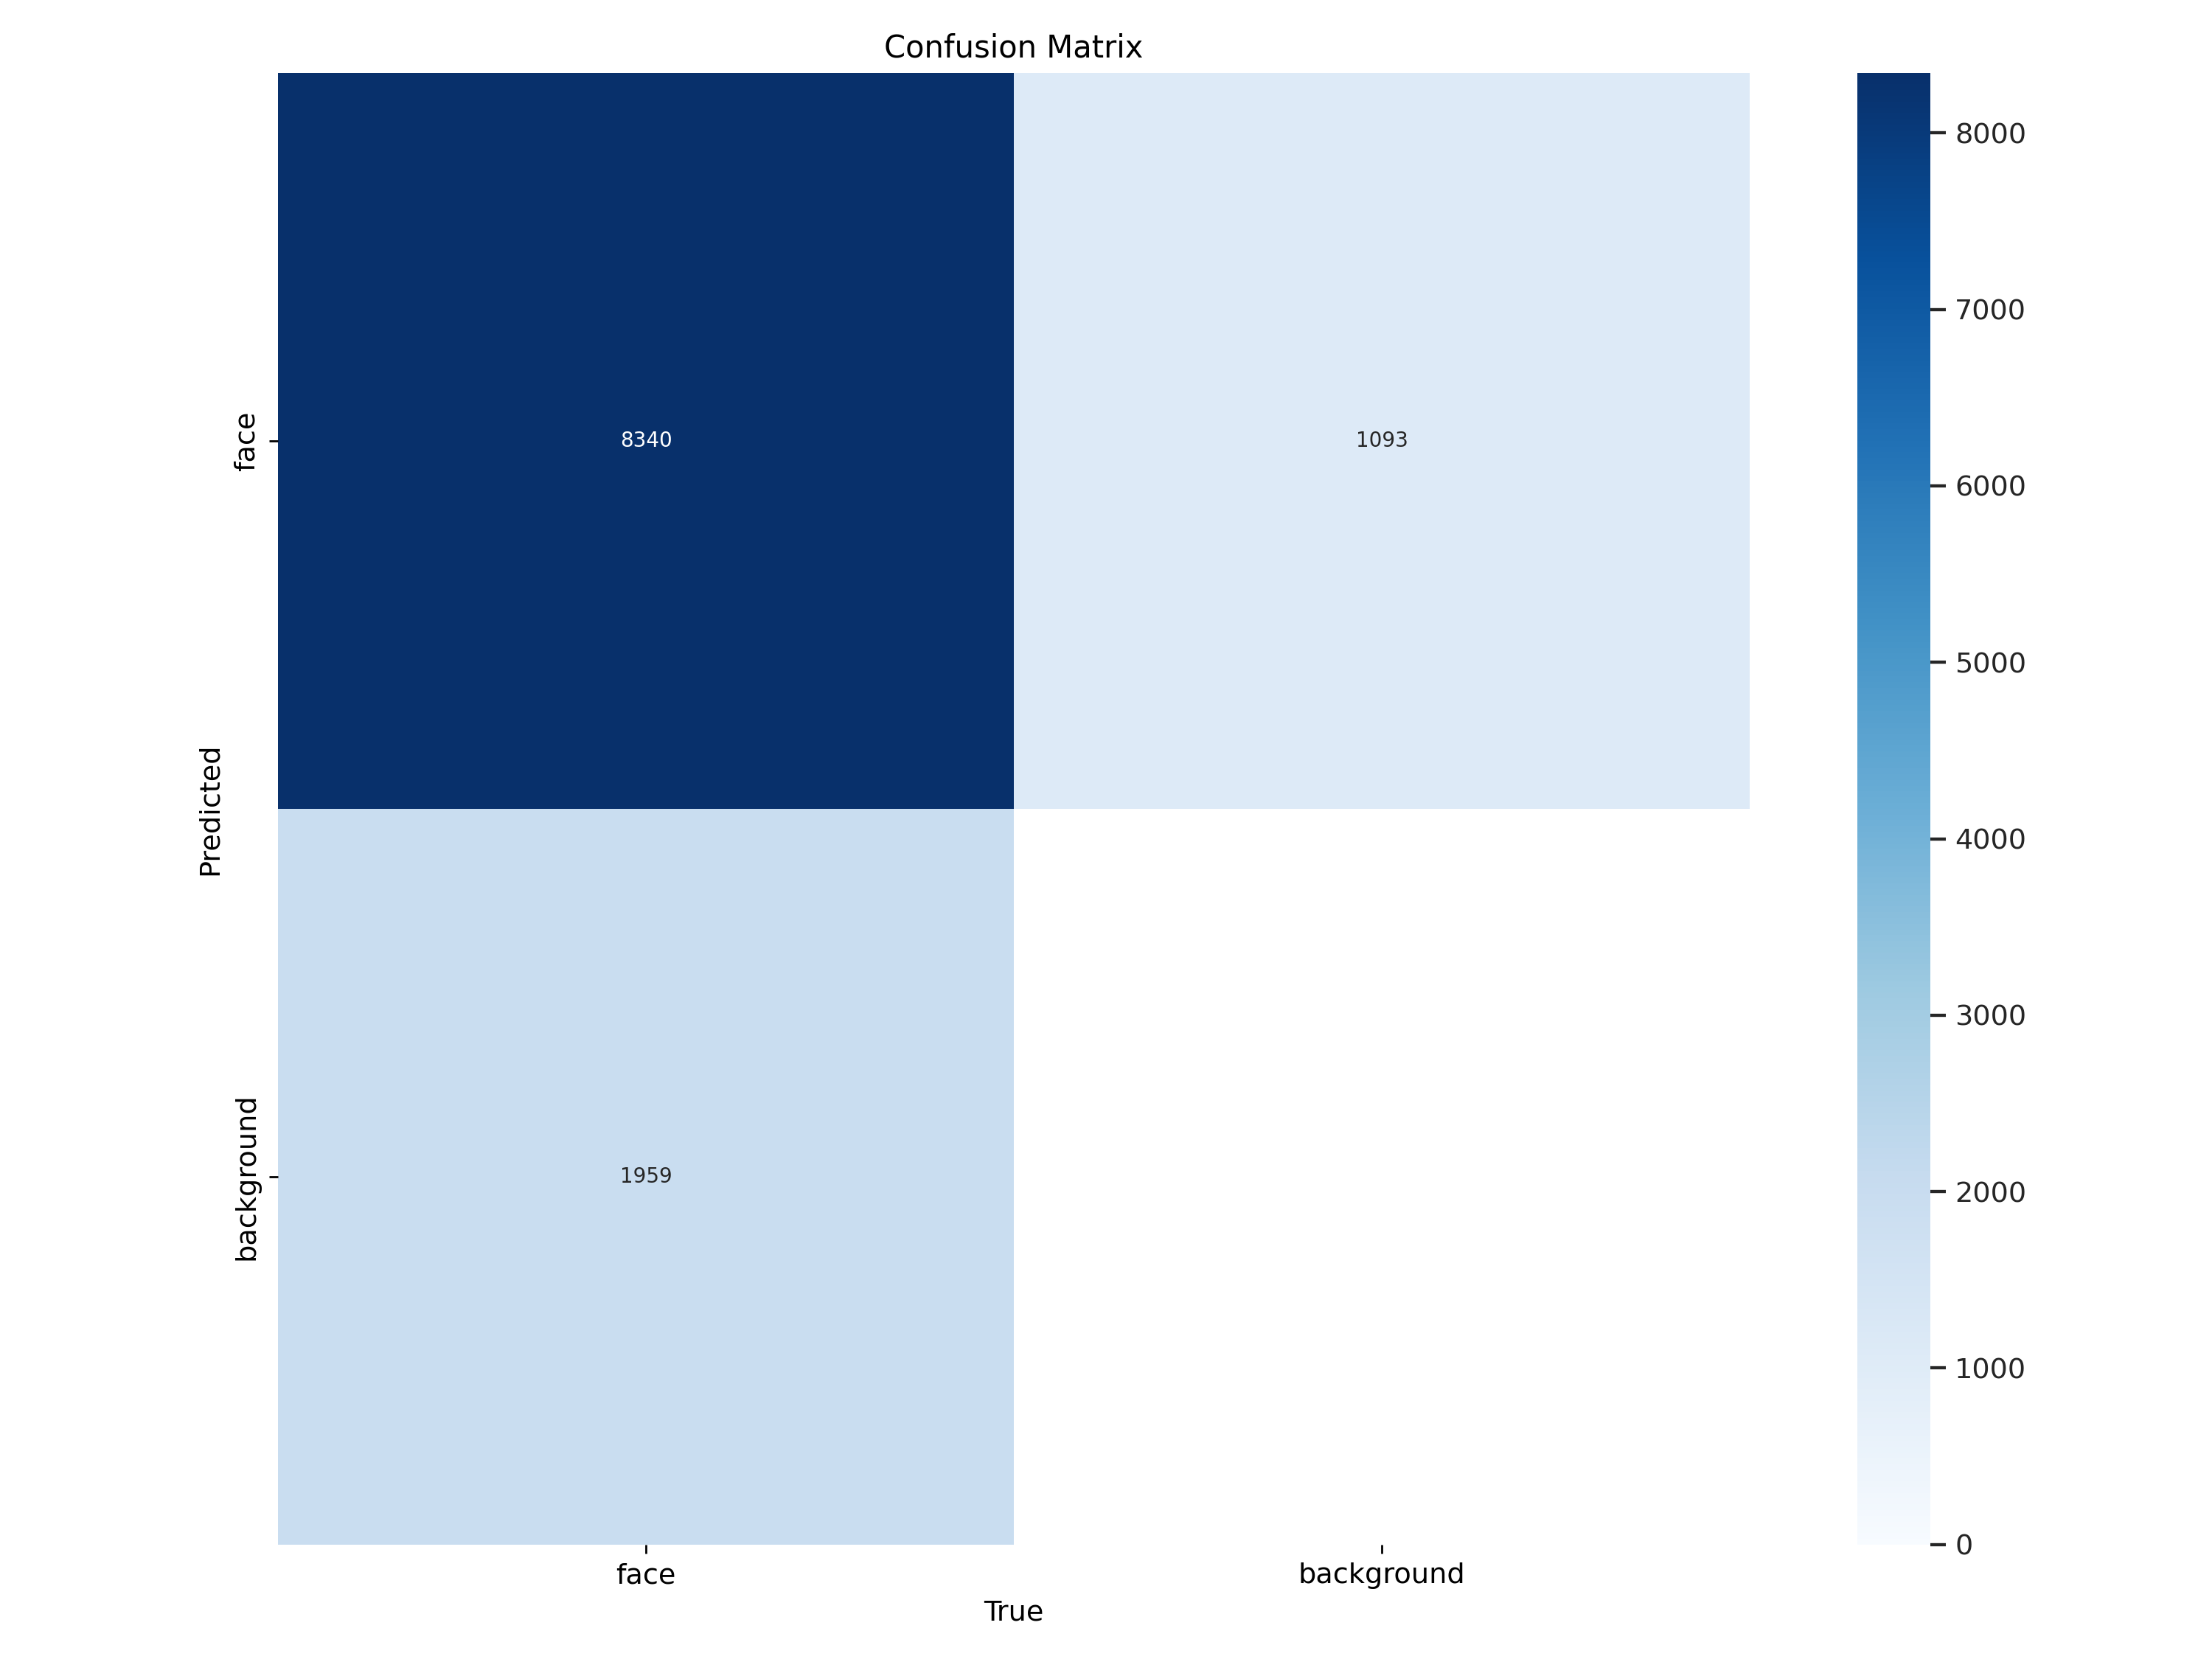

In [31]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

##Accuracy and Losses Metrics

/content


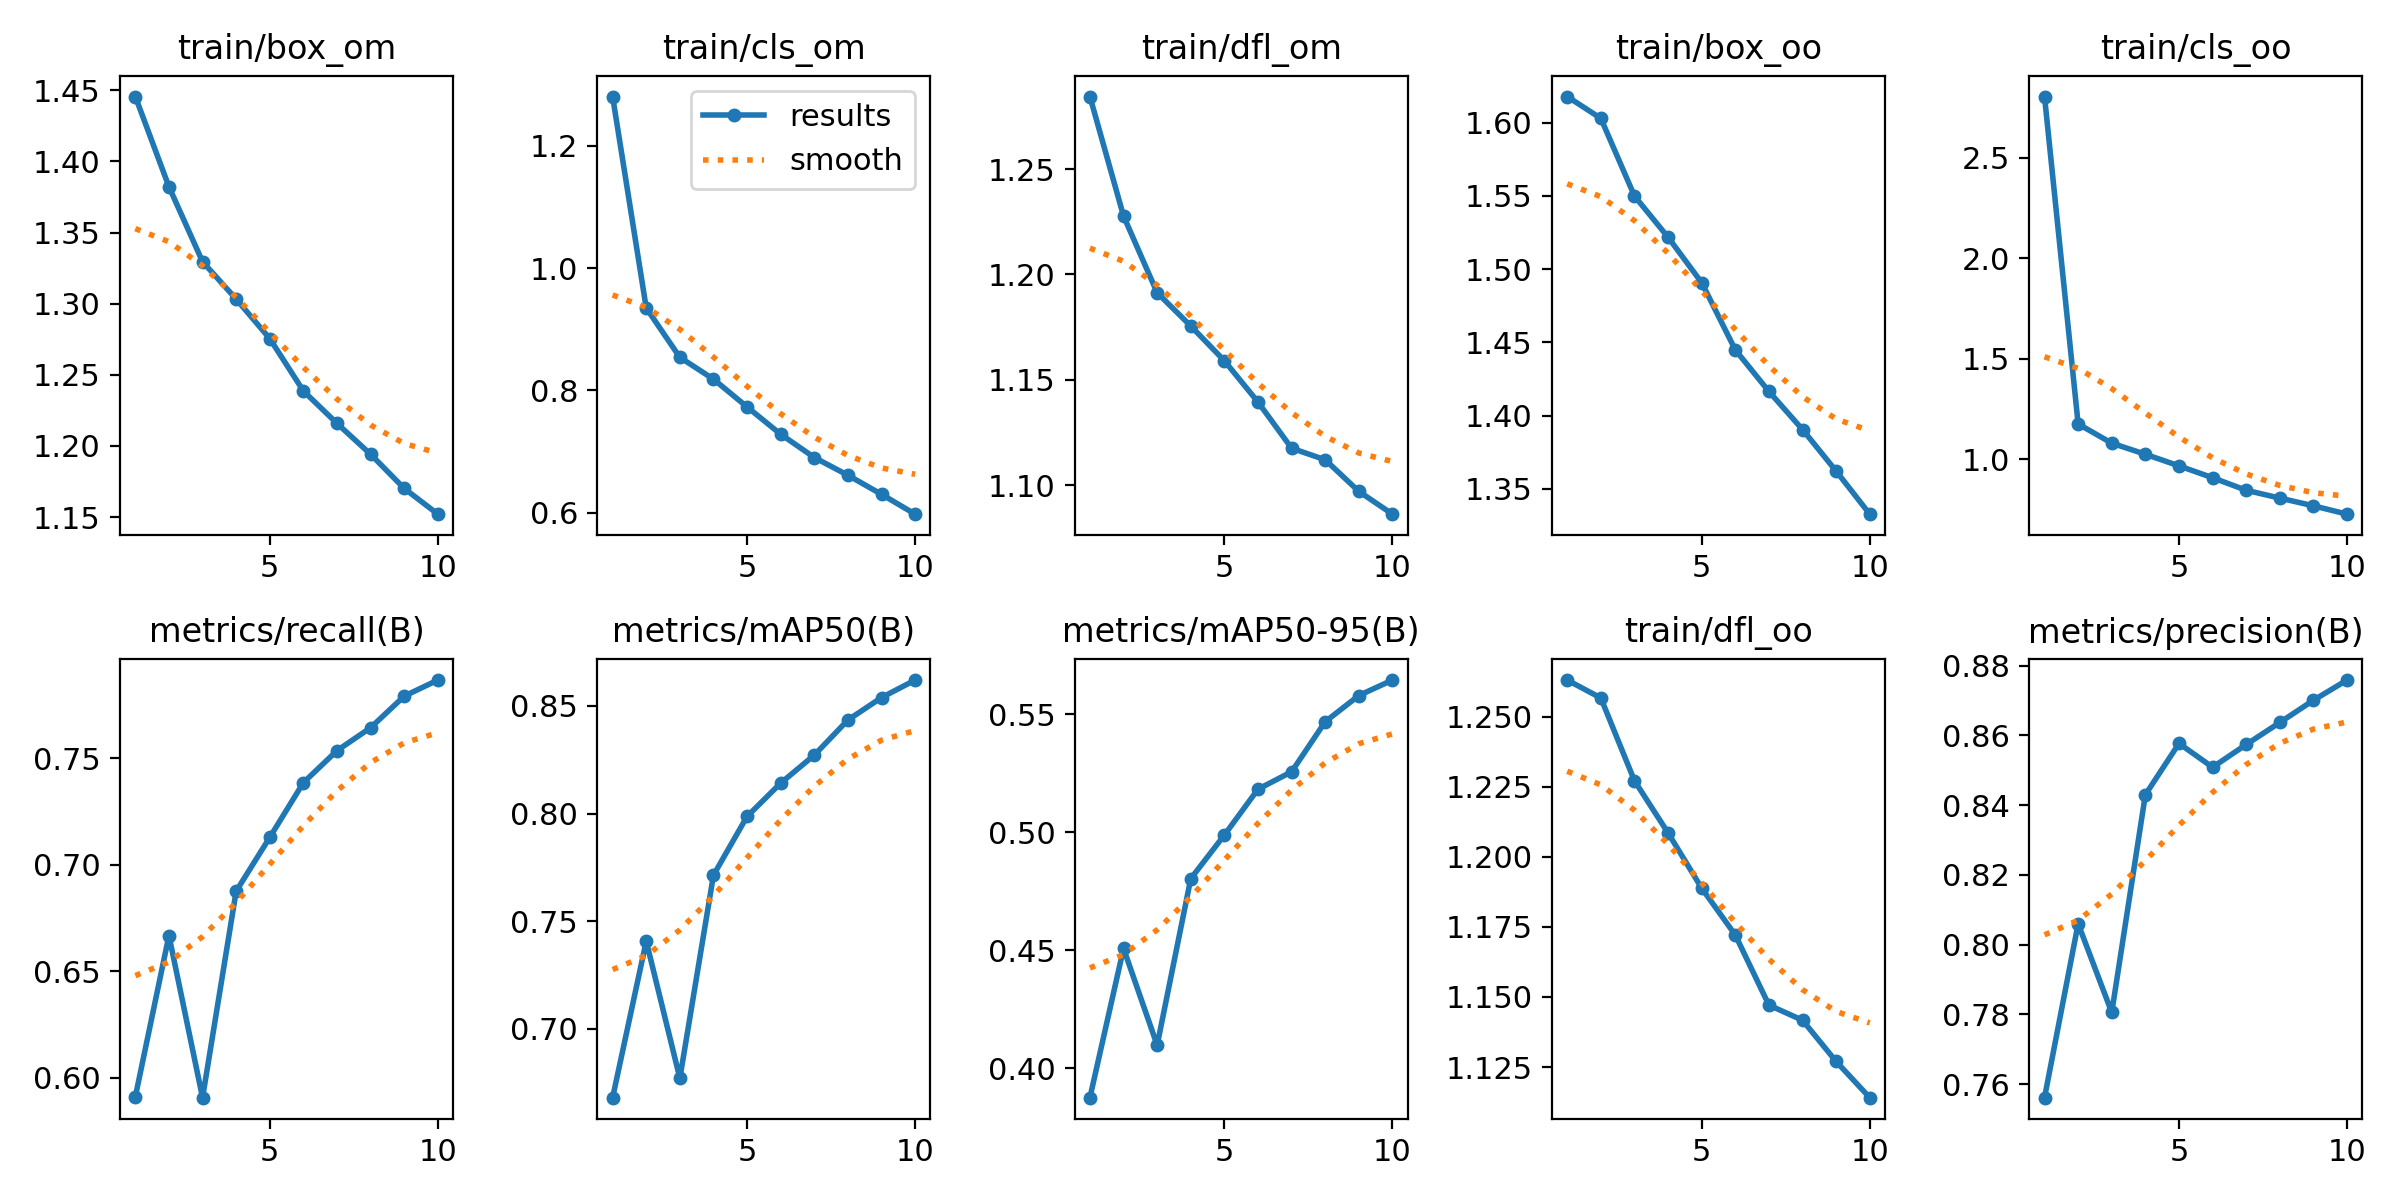

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

Predict on testing

In [23]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path="/content/datasets/face-detection-dataset/images/val",
    annotations_directory_path="/content/datasets/face-detection-dataset/labels/val",
    data_yaml_path="/content/datasets/face-detection-dataset/dataset.yaml"
)
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()


0: 480x640 1 face, 14.3ms
Speed: 3.5ms preprocess, 14.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


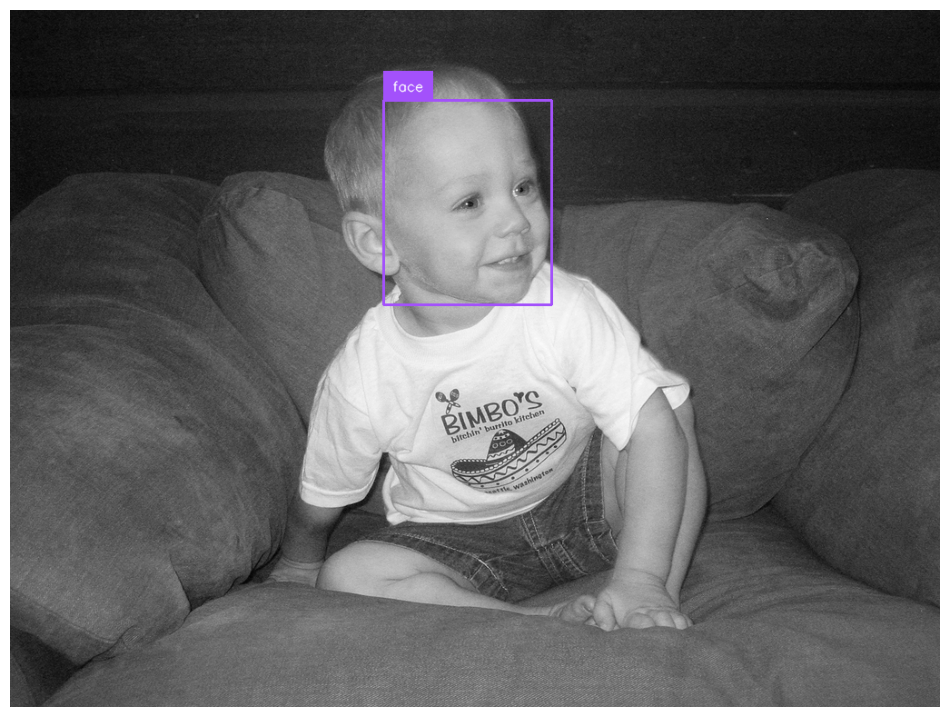

In [30]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)